# 1. Sampling in Python

Assume that we want to replicate the results from toll the dice 10,000 to see the outcome probability.
The dice has 6 possible outcomes: 1, 2, 3, 4, 5, 6.

In [1]:
outcomes = [1, 2, 3, 4, 5, 6]

In [2]:
import numpy as np
? np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
-------
samples : single item or ndarray
    The generated random samples

Rais

Now let check one example: we toll the dice once to see what is the outcome:

In [3]:
np.random.choice(outcomes, size=1)[0]

5

In [4]:
np.random.choice(outcomes, size=1)[0]

3

We need a list to store the outcomes:

In [5]:
actualOutcomes = []

Now let's toll 10,000 times to see:

In [6]:
for i in np.arange(10001):
    actualOutcomes.append(np.random.choice(outcomes, size=1)[0])

In [7]:
actualOutcomes[0:10]

[2, 5, 1, 2, 6, 6, 3, 6, 4, 2]

Now it is time to check the frequency of the outcomes:

In [8]:
import pandas as pd

pd.Series(actualOutcomes).value_counts().sort_index()

1    1680
2    1654
3    1694
4    1654
5    1693
6    1626
dtype: int64

In [9]:
pd.Series(actualOutcomes).value_counts().sort_index() / 10000  # return probability

1    0.1680
2    0.1654
3    0.1694
4    0.1654
5    0.1693
6    0.1626
dtype: float64

How about we have 1,000,000 times:

In [10]:
actualOutcomes = []
for i in np.arange(1000001):
    actualOutcomes.append(np.random.choice(outcomes, size=1)[0])
pd.Series(actualOutcomes).value_counts().sort_index() / 10000  # return probability

1    16.7045
2    16.6677
3    16.6420
4    16.6939
5    16.6570
6    16.6350
dtype: float64

This number is equivalent to this:

In [11]:
100 / 6

16.666666666666668

# 2. Monte Carlo Simulation

This gives you the example that we cover in the lecture. Let:

- $\mu = 15\%$
- $\sigma = 0.3$
- time interval $\Delta t = 1/52 = 0.0192$
- $e : N(0,1)$
- Initial stock price $S = 100$

In [12]:
mu = 0.15
sigma = 0.3
t = 0.0192
S = 100

In [13]:
e = np.random.randn(10)

In [14]:
e

array([ 1.10017814, -0.29809581, -2.07911915, -0.78575186,  0.28932416,
       -0.89049571,  2.1886207 , -2.03610136,  1.2988189 ,  0.04955668])

In [15]:
deltaS = mu * t + sigma * e * np.sqrt(t)

In [16]:
deltaS

array([ 0.04861355, -0.00951161, -0.08354736, -0.02978309,  0.01490698,
       -0.03413721,  0.09385925, -0.08175914,  0.05687089,  0.00494003])

In [17]:
S + deltaS

array([100.04861355,  99.99048839,  99.91645264,  99.97021691,
       100.01490698,  99.96586279, 100.09385925,  99.91824086,
       100.05687089, 100.00494003])

In [18]:
pd.DataFrame({"S": S + deltaS, "epsilon": e, "delta S": deltaS})

,S,epsilon,delta S
0,100.048614,1.100178,0.048614
1,99.990488,-0.298096,-0.009512
2,99.916453,-2.079119,-0.083547
3,99.970217,-0.785752,-0.029783
4,100.014907,0.289324,0.014907
5,99.965863,-0.890496,-0.034137
6,100.093859,2.188621,0.093859
7,99.918241,-2.036101,-0.081759
8,100.056871,1.298819,0.056871
9,100.004940,0.049557,0.004940


We are interested in the last predicted price in the next 10 weeks:

In [19]:
(S + deltaS)[9]

100.00494003258659

Repeat this process 1,000 times give us 1,000 possible forecasts:

In [20]:
def oneForecast(S=100, mu=0.15, sigma=0.30, t=1 / 52, k=10):
    e = np.random.randn(k)
    deltaS = mu * t + sigma * e * np.sqrt(t)
    return (S + deltaS)[k - 1]


oneForecast()

99.99037401705453

In [21]:
oneForecast()

99.96133483764022

In [22]:
oneForecast()

99.94513321529031

In [23]:
np.random.seed(42)
for i in range(10):
    print(oneForecast())

100.0254564775827
99.9441292298651
99.99074942186601
100.01107453784705
99.92953771137466
100.04346974589272
99.9760460112995
99.9201967503641
100.02423783132441
99.99312520071598


In [24]:
ForecastPrice = []
np.random.seed(42)
for i in range(1000):
    x = oneForecast()
    ForecastPrice.append(x)

In [25]:
ForecastPrice[0:10]

[100.0254564775827,
 99.9441292298651,
 99.99074942186601,
 100.01107453784705,
 99.92953771137466,
 100.04346974589272,
 99.9760460112995,
 99.9201967503641,
 100.02423783132441,
 99.99312520071598]

(array([  3.,  28.,  94., 201., 289., 241., 109.,  31.,   3.,   1.]),
 array([ 99.87072575,  99.89996997,  99.92921419,  99.9584584 ,
         99.98770262, 100.01694684, 100.04619106, 100.07543528,
        100.1046795 , 100.13392372, 100.16316793]),
 <a list of 10 Patch objects>)

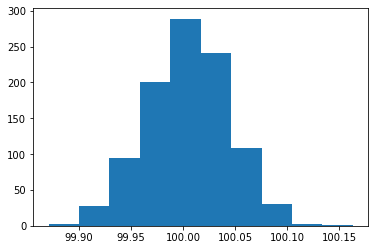

In [26]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(ForecastPrice, bins = 10)